# BEATS DMM commissioning - energy scans
- Mo 0.2 mm

______________________________________________________

Author:         Gianluca Iori (gianthk.iori@gmail.com)

Created on:   28/11/2023

Last update:  28/11/2023
______________________________________________________


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sc
from scipy import constants
import dxchange
# from pandas_ods_reader import read_ods
# import h5py

astropy module not found
olefile module not found


In [63]:
from DMM.commissioning.tomoalign_simple import fit_profile

In [60]:
# plt.style.use('seaborn-v0_8-talk')
plt.style.use('seaborn-v0_8-notebook')
# plt.style.use('tableau-colorblind10')
# plt.style.use('default')

In [33]:
%matplotlib inline
font = {'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

In [68]:
matplotlib.rcParams['figure.dpi'] = 200

In [12]:
work_dir = '/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/energy_scans/'

## 1. STRIPE 1 - Mo - 20.000 keV
### 1.1 Read SSCAN data

In [13]:
h5file = '/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/energy_scans/Mo/DMM_Mo_scan_003.h5'

In [14]:
data = dxchange.read_hdf5(h5file, "/entry/data/data")
print(data.shape)

(82, 2160, 2560)


Pitch cradles encoders readout

In [51]:
ML1_p_mo = [-0.778193552, -0.776018853, -0.773714302, -0.771424896, -0.769119601, -0.766819519, -0.764547245, -0.762239963, -0.759953785, -0.757660655, -0.755385154, -0.753071416, -0.750799887, -0.748481433, -0.746211145, -0.743903615, -0.741613713, -0.739331259, -0.737041357, -0.734738792, -0.732442931, -0.730161967, -0.7278815, -0.72557968, -0.723280344, -0.720985476, -0.718695325, -0.716408651, -0.714106087, -0.711814943, -0.709529758, -0.707231415, -0.704974286, -0.702652852, -0.700352273, -0.698071558, -0.695776938, -0.693474126, -0.691196389, -0.688904997, -0.686606654 ]
ML2_p_mo = [-0.778207213, -0.775972678, -0.773692956, -0.771401564, -0.76909751, -0.766803635, -0.764513484, -0.762228548, -0.759916797, -0.75764204, -0.755340469, -0.75303989, -0.750766871, -0.748477466, -0.746160998, -0.743860171, -0.741569276, -0.739283098, -0.737009582, -0.734700811, -0.73243102, -0.730112317, -0.727819187, -0.725543437, -0.723269673, -0.720948487, -0.718654364, -0.716370918, -0.714075802, -0.711779692, -0.709499225, -0.707223475, -0.704917683, -0.702600718, -0.700337879, -0.698029852, -0.695743674, -0.693449303, -0.691181249, -0.688873719, -0.686585307]
ML1_p_flat = [-0.778208945, -0.775998245, -0.773700895, -0.771418193, -0.769135739, -0.766835409, -0.764525644, -0.762239963, -0.759974144, -0.757656683, -0.755397071, -0.753099472, -0.750774314, -0.748508495, -0.74622058, -0.743906842, -0.741617189, -0.73932381, -0.737043343, -0.73474053, -0.732449138, -0.730166188, -0.727888204, -0.72557397, -0.723278109, -0.720987214, -0.718699546, -0.716396733, -0.714096404, -0.711812957, -0.709516848, -0.707229428, -0.704962368, -0.702665018, -0.700374122, -0.698083972, -0.69577818, -0.693482319, -0.6911949, -0.688930819, -0.68661882]
ML2_p_flat = [-0.778202993, -0.775981865, -0.773692459, -0.771388901, -0.769111165, -0.766807359, -0.764508022, -0.762210423, -0.759921266, -0.757649489, -0.755349159, -0.753045353, -0.750743036, -0.748440472, -0.746171425, -0.743879537, -0.74159907, -0.739295264, -0.736998658, -0.734724149, -0.732416619, -0.730138138, -0.727836815, -0.725538471, -0.723245341, -0.720952212, -0.71865933, -0.716388546, -0.714071084, -0.711789127, -0.709498977, -0.70720684, -0.704918428, -0.702605932, -0.700340113, -0.698043011, -0.695736722, -0.693446572, -0.69117827, -0.688866023, -0.686598962]

### 1.2 Correct flat-field

In [19]:
data_mo = data[0:41,:,:]
data_flat = data[41:,:,:]
print(data_mo.shape)

(41, 2160, 2560)


In [20]:
data_norm = data_mo/data_flat

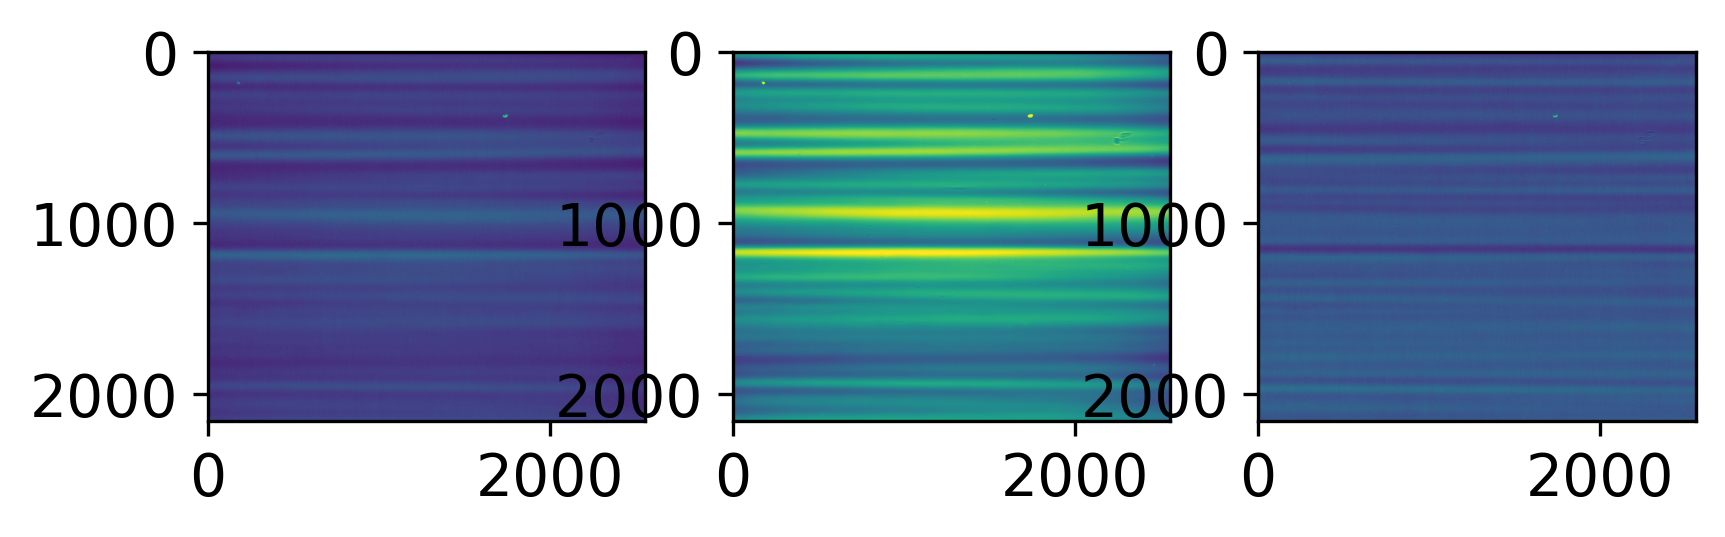

In [34]:
step = 21
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(data_mo[step, :, :])
ax2.imshow(data_flat[step, :, :])
ax3.imshow(data_norm[step, :, :])

### 1.3 Get intensity average for each step

In [41]:
I_norm = np.zeros(data_norm.shape[0], dtype='float32')
for step in range(0, data_norm.shape[0]):
    I_norm[step] = np.mean(data_norm[step,:,:])

Text(0, 0.5, 'Transmitted intensity [a.u.]')

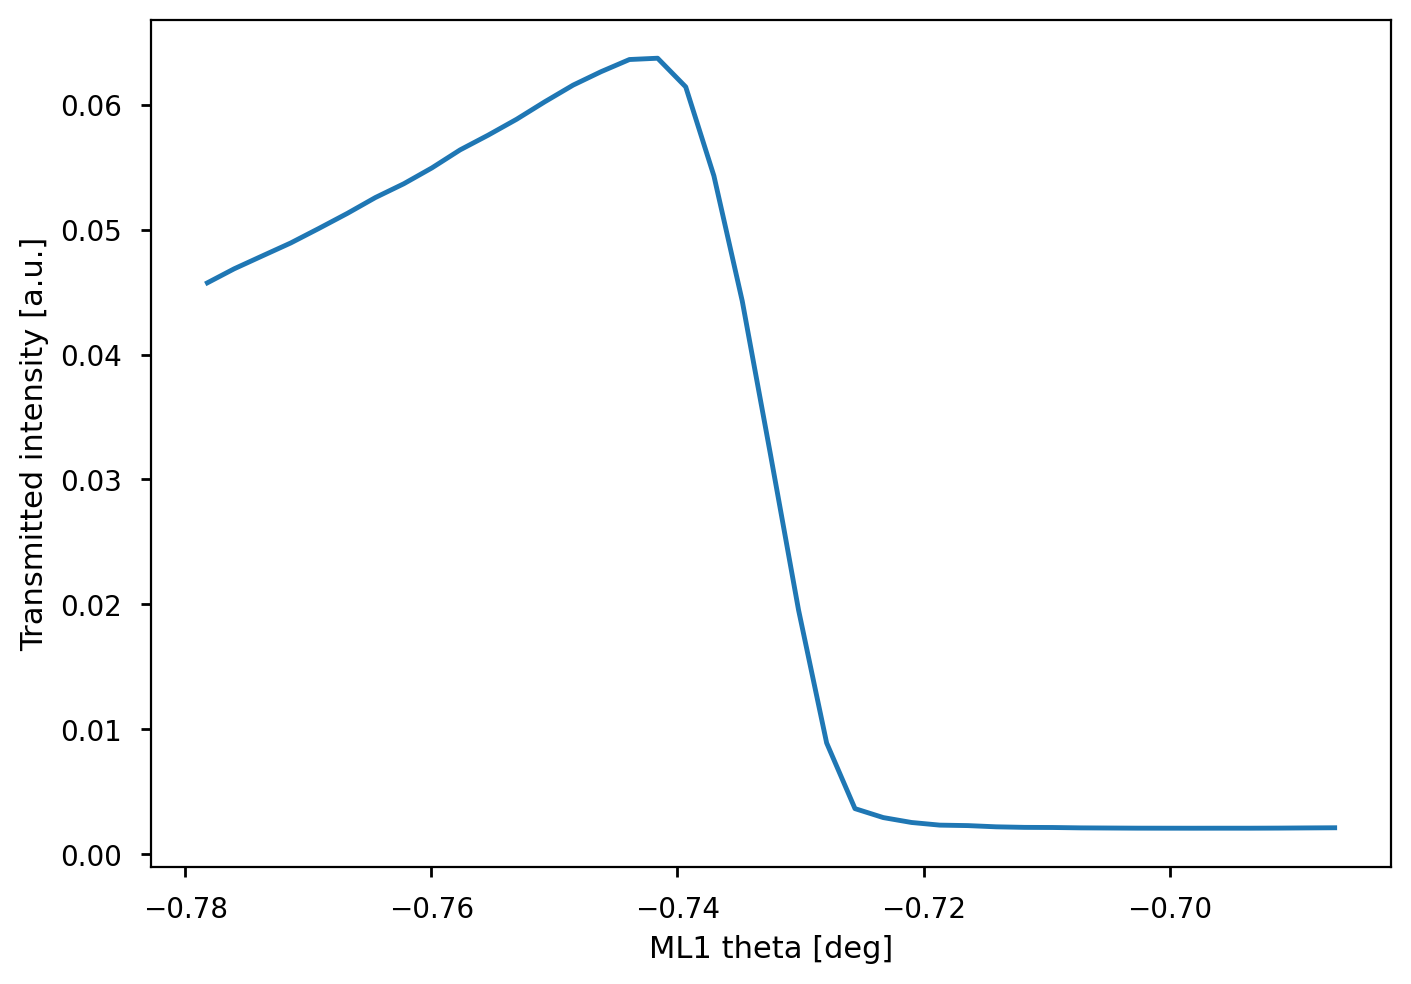

In [69]:
plt.plot(ML1_p_mo,I_norm)
plt.xlabel("ML1 theta [deg]")
plt.ylabel("Transmitted intensity [a.u.]")

### 1.4 Perform curve fit

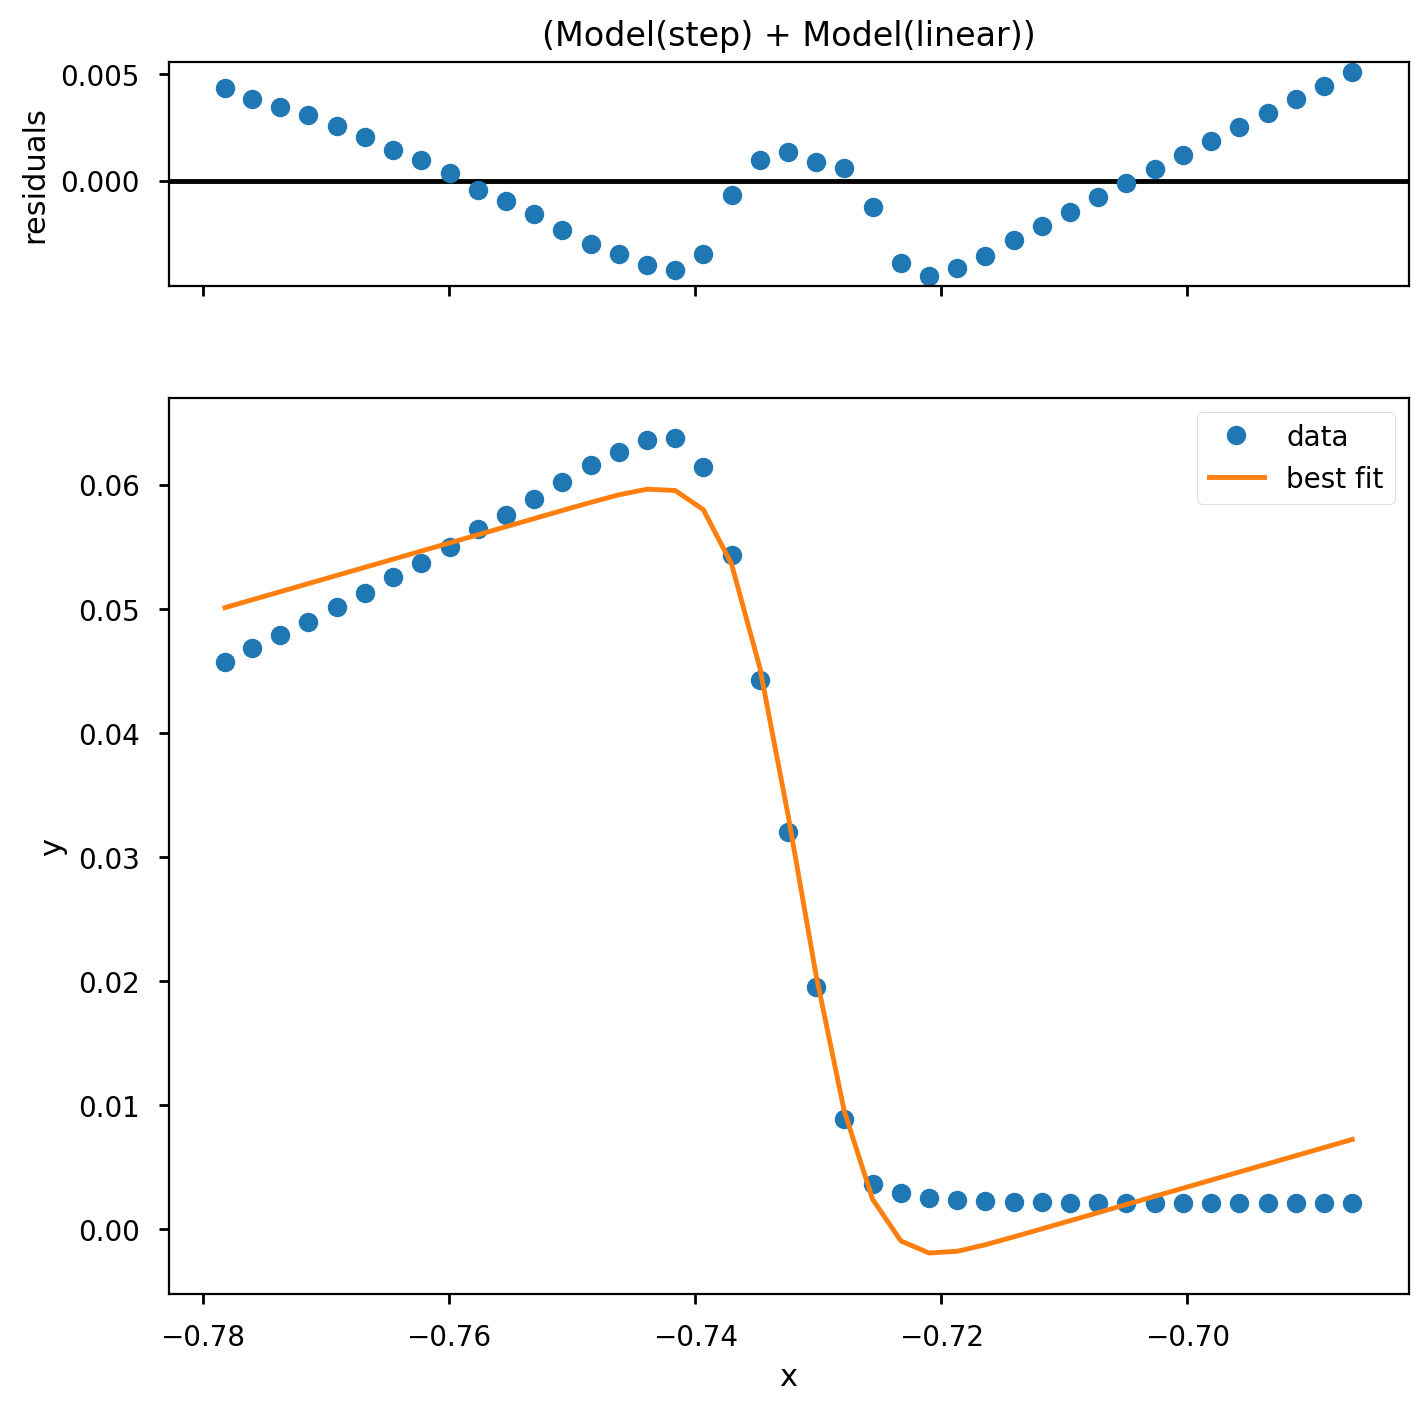

In [70]:
fit_profile(ML1_p_mo, I_norm, profile='step', background='linear', plot=True) # , width=1400

## 2. STRIPE 1 - Pd - 24.350 keV
### 2.1 Read SSCAN data
Edge scan images

In [73]:
h5file = '/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/energy_scans/Pd/DMM_Pd_scan_000.h5'

In [74]:
data = dxchange.read_hdf5(h5file, "/entry/data/data")
print(data.shape)

(82, 2160, 2560)


Pitch cradles encoders readout

In [75]:
ML1_p_edge = [-0.640010882, -0.637755491, -0.6354713, -0.633182639, -0.630868157, -0.62859191, -0.626314174, -0.624006396, -0.621729901, -0.619436771, -0.617137434, -0.61484207, -0.612563589, -0.610250845, -0.607961191, -0.605687675, -0.603395787, -0.601116064, -0.598828149, -0.596525832, -0.594212343, -0.591947021, -0.589656623, -0.587348596, -0.585045287, -0.582773757, -0.580472682, -0.578172104, -0.575911003, -0.573621349, -0.571323998, -0.569030124, -0.566728304, -0.564426733, -0.562143783, -0.559853136, -0.557554295, -0.5552706, -0.552988395, -0.55068161, -0.548413308]
ML2_p_edge = [-0.639970666, -0.637716764, -0.635454173, -0.633134229, -0.630841596, -0.628569073, -0.626284137, -0.62397462, -0.621689684, -0.619381906, -0.617101686, -0.614816005, -0.612535289, -0.610222297, -0.607927677, -0.605641251, -0.603340176, -0.601062688, -0.598772538, -0.596481394, -0.594220541, -0.5918857, -0.589599771, -0.587306641, -0.585018725, -0.582754892, -0.580432714, -0.578142067, -0.575852661, -0.573573683, -0.571290485, -0.568961354, -0.566687094, -0.564404888, -0.562109276, -0.559803235, -0.557527485, -0.555240562, -0.552940232, -0.550662993, -0.548355959]
ML1_p_flat = [-0.639974385, -0.637772871, -0.635463355, -0.633171963, -0.630875605, -0.628594641, -0.626303001, -0.624003416, -0.621722949, -0.619433543, -0.617139172, -0.61485647, -0.612543478, -0.610254817, -0.607964667, -0.605670047, -0.603383621, -0.601094712, -0.598803569, -0.596492066, -0.594233447, -0.591928152, -0.589629312, -0.587342637, -0.585048514, -0.582752902, -0.580469703, -0.57816987, -0.575889651, -0.573604218, -0.571319778, -0.569040303, -0.566743698, -0.564426485, -0.562161659, -0.559839232, -0.557560254, -0.555278297, -0.55297896, -0.550694272, -0.548401887]
ML2_p_flat = [-0.639945837, -0.637705592, -0.635438531, -0.633142422, -0.630873128, -0.628552935, -0.626279916, -0.623968662, -0.62170036, -0.619383395, -0.617122045, -0.614809798, -0.612532806, -0.610245139, -0.607957223, -0.605635541, -0.603350853, -0.60105524, -0.598781476, -0.596476677, -0.594199189, -0.591918722, -0.589598281, -0.587324517, -0.585005318, -0.582745954, -0.580448355, -0.578142315, -0.575839006, -0.573581877, -0.571284774, -0.568996114, -0.566698018, -0.564395205, -0.562116724, -0.559799263, -0.557515568, -0.555236342, -0.552948426, -0.55065033, -0.548350745]

### 2.2 Correct flat-field

In [76]:
data_edge = data[0:41,:,:]
data_flat = data[41:,:,:]
print(data_edge.shape)

(41, 2160, 2560)


In [77]:
data_norm = data_edge/data_flat

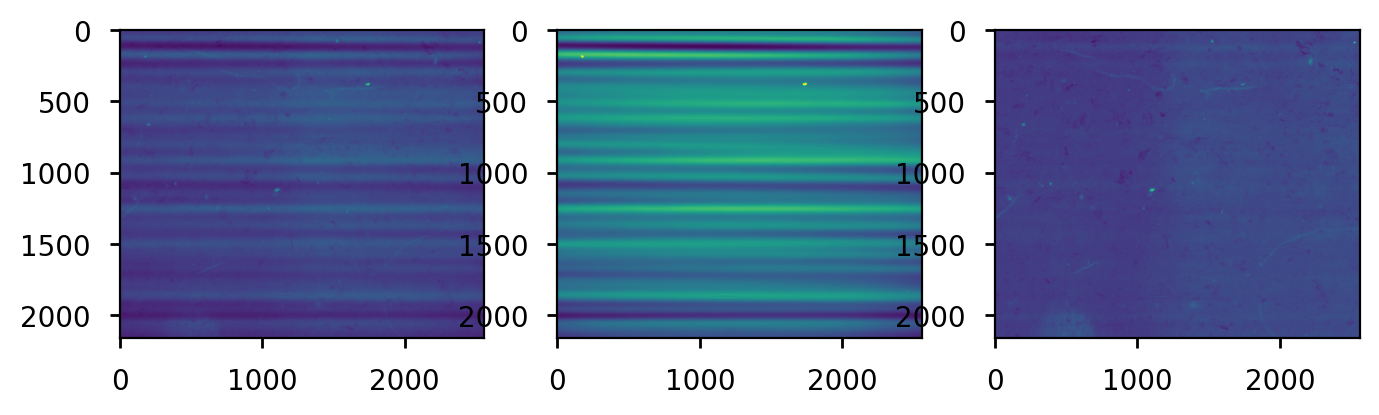

In [81]:
step = 30
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(data_edge[step, :, :])
ax2.imshow(data_flat[step, :, :])
ax3.imshow(data_norm[step, :, :])

### 2.3 Get intensity average for each step

In [82]:
I_norm = np.zeros(data_norm.shape[0], dtype='float32')
for step in range(0, data_norm.shape[0]):
    I_norm[step] = np.mean(data_norm[step,:,:])

Text(0, 0.5, 'Transmitted intensity [a.u.]')

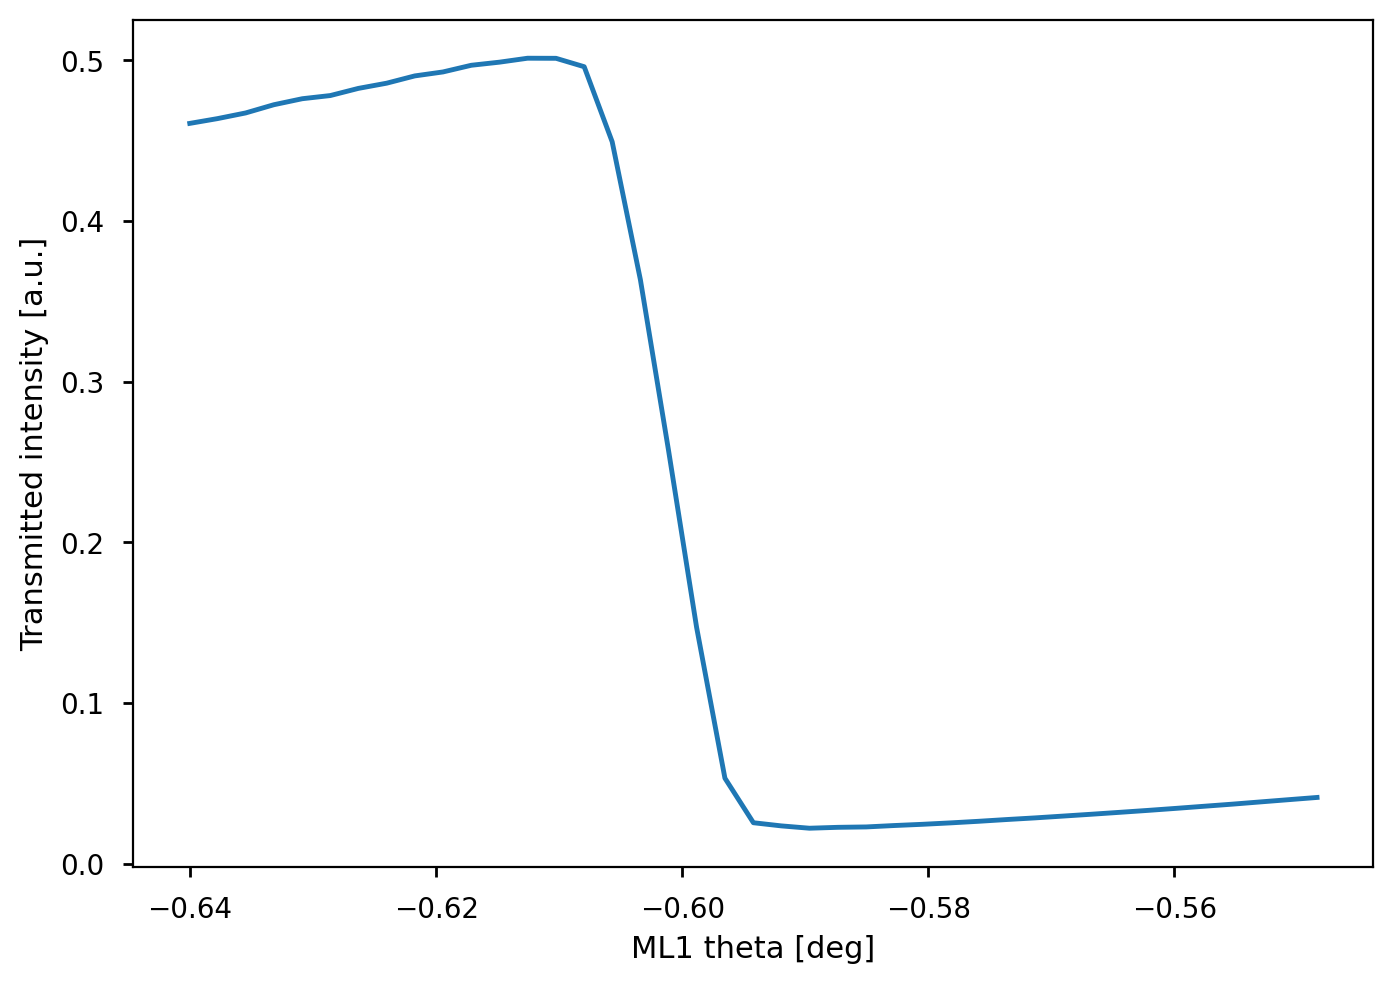

In [83]:
plt.plot(ML1_p_edge,I_norm)
plt.xlabel("ML1 theta [deg]")
plt.ylabel("Transmitted intensity [a.u.]")

### 2.4 Perform curve fit

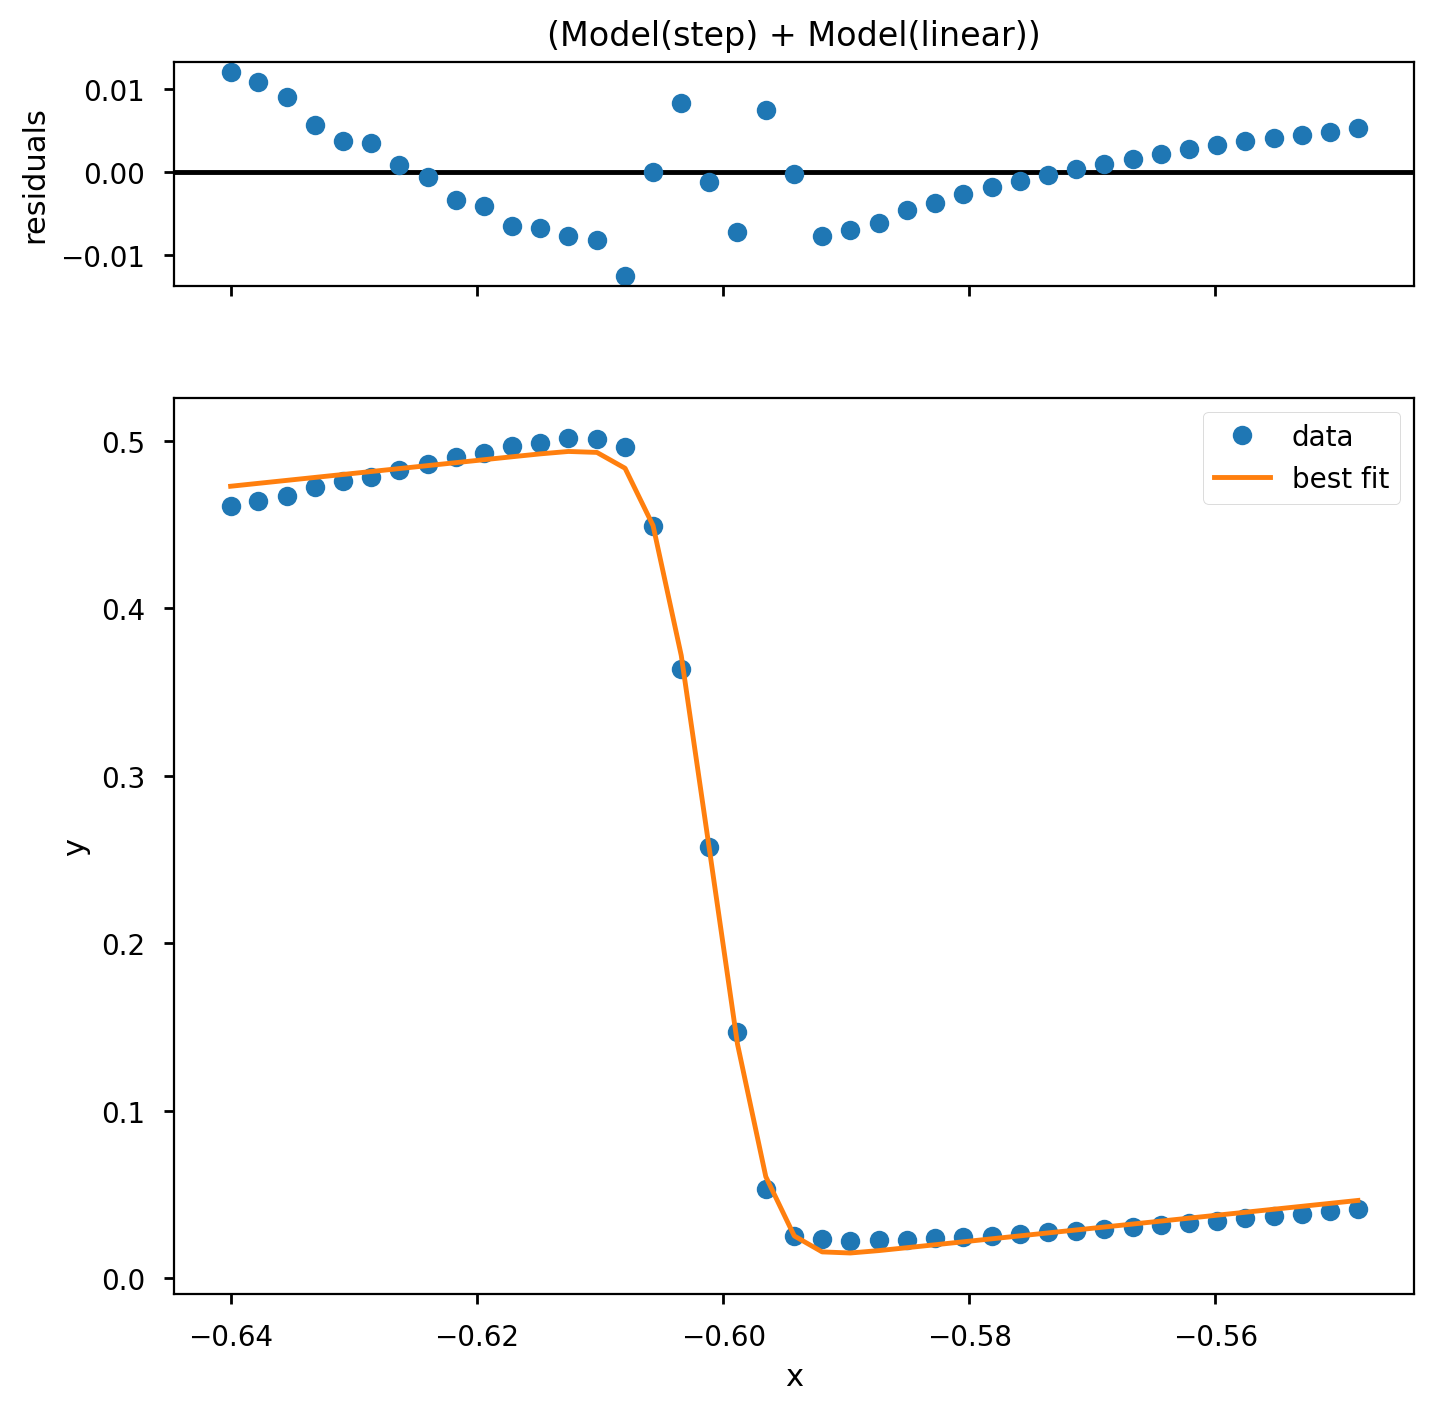

In [84]:
fit_profile(ML1_p_edge, I_norm, profile='step', background='linear', plot=True) # , width=1400